20년 후의 주가:
23482.282978912513
21560.8483397265
15298.056942375004
25761.3456475108
17938.938072094392
15924.600863648891
27127.818025392655
15462.768972461436
14064.965165738115
27827.091754445515

표본평균: 20444.871676230578
표본분산: 25662191.979698367


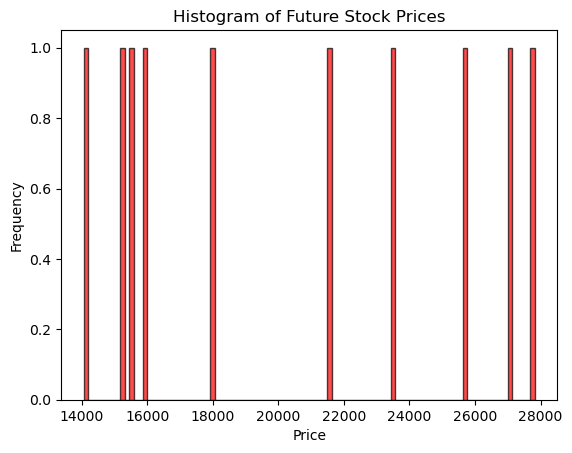

배당률: 0.002
PER: 2.5


In [28]:
import numpy as np
import matplotlib.pyplot as plt

class Stock:
    #(1)
    def __init__(self, expected_return, volatility, current_price):
        self.expected_return = expected_return
        self.volatility = volatility
        self.current_price = current_price
    
    """
    expected_return 은 기대수익률, volatiliy는 변동성,
    current_price는 현재주가를 의미하는 멤버변수입니다.
    """
    #(2)
    def calculate_future_price(self, T, seed, size):
        np.random.seed(seed)
        z = np.random.rand(size)
        future_price = self.current_price * np.exp(
            (self.expected_return - 0.5 * self.volatility**2) * T 
            + self.volatility * np.sqrt(T) * z
        )
        return future_price
    
    """
    z는 정규분포 N(0,1)을 따르므로 rand를 사용했습니다.
    또한 주어진 size값에 따라 T년 후의 주가가 다른 정규분포샘플에 의해
    생성되어야 하므로 z값을 size값 만큼 샘플링하여 future_price에 저장되고
    리턴되게 코드를 구성하였습니다.
    """
    #(3)
    def calculate_sample_statistics(self, T, seed):
        future_prices = self.calculate_future_price(T, seed, size)
        sample_mean = np.mean(future_prices)
        sample_variance = np.var(future_prices)
        return sample_mean, sample_variance
    """
    T년 후의 주가를 size 개수만큼 샘플링하여
    표본평균은 numpy mean 함수로, 표본분산은 numpy ver 함수로
    계산하는 함수입니다.
    """
    #(4-1)
    def plot_price_histogram(self, T, seed, size):
        future_prices = self.calculate_future_price(T, seed, size)
        plt.hist(future_prices, color = 'red', alpha = 0.7, 
                 bins = 100, edgecolor = 'black')
        plt.xlabel('Price')
        plt.ylabel('Frequency')
        plt.title('Histogram of Future Stock Prices')
        plt.show()
    """
    #(2)의 결과를 히스토그램으로 그려주는 함수입니다.
    그래프의 색깔은 빨간색이고 외곽선은 검정색으로 설정하였으며,
    투명도는 0.7, 그래프의 가로축 구간의 갯수는 100개로 설정하였습니다.
    또한 최상단에는 Histogram of Future Stock Prices이라는 title을,
    x축에는 Pirce, y축에는 Frequency라는 label을 달아주어
    히스토그램을 보다 직관적으로 만들어주었습니다.
    """
    #(4-2)
    def calculate_dividend_yield(self, dividend):
        dividend_yield = dividend / self.current_price
        return dividend_yield
    """
    배당금을 dividend라는 멤버변수로 받아온 후 
    '배당 / 현재 주가' 식을 통해 배당률을
    dividend_yield 라는 변수에 저장하는 함수입니다.
    """
    #(4-3)
    def calculate_per_ratio(self, earnings):
        per_ratio = self.current_price / earnings
        return per_ratio
    """
    당기순이익을 earnings이라는 멤버변수로 받아온 후
    '현재 주가 / 당기순이익' 식을 통해 PER을 계산해
    per_ratio 라는 변수에 저장하는 함수입니다.
    """

expected_return = 0.07 
volatility = 0.2 
current_price = 5000
stock = Stock(expected_return, volatility, current_price)

T = 20
seed = 2471692
size = 10
future_prices = stock.calculate_future_price(T, seed, size)
print("%s년 후의 주가:"%T, *future_prices, sep='\n')
"""
%s를 통하여 T라는 문자를 문장 속에 출력되게 만들었고,
unpacking operator *을 통해 리스트 future_prices를 
unpacking한 데이터로 전달하고, sep을 사용해 T년 후의 주가가 
줄을 나눠 깔끔하게 출력되도록 하였다.
"""
sample_mean, sample_variance = stock.calculate_sample_statistics(T, seed)
print("\n표본평균:", sample_mean)
print("표본분산:", sample_variance)
"""
표본평균 앞에 \n을 사용해 가시성을 높였다.
"""

stock.plot_price_histogram(T, seed, size)

dividend = 10
dividend_yield = stock.calculate_dividend_yield(dividend)
print("배당률:", dividend_yield)

earnings = 2000
per_ratio = stock.calculate_per_ratio(earnings)
print("PER:", per_ratio)